## Student Performance Indicator

#### Lifecycle of Machine Learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory Data Analysis
* Data Pre-Processing
* Model Training
* Model Evaluation
* Model Testing



1) Problem Statement
* How a Student's performance is affected by various factors such as Gender,ethnicity,Parental level of education,Lunch and Test Preparation Course.

2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

##### 2.1 Import the data and the packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Import Data using pandas 

In [3]:
df = pd.read_csv("data/stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

##### 2.2 Dataset Information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score :subjects
* reading score : subjects
* writing score : subjects

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3. Data checks to perform

##### 3.1 Check for missing values

In [7]:
df.isna().sum()


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no Missing Values

##### 3.2 Check for Duplicates

In [8]:
df.duplicated().sum()

0

##### There are no duplicate values

##### 3.3 Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### 3.4 Check statistics of data

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights 
* From the above description of numerical data,all mean values are very close to each other and lies between 66 to 69.16
* All standard deviation values are close to and lies between 14.6 and 15.19
* The minimum score of math is '0',writing_score is much higher which is '10' and reading_score is '17'

#### 3.5 Exploring more of the data

In [11]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [12]:
# checking the number of categories in each categorical variable
print("The categories in variable 'gender':--{}".format(df['gender'].unique()))
print("The categories in variable 'race_ethnicity':--{}".format(df['race_ethnicity'].unique()))
print("The categories in variable 'parental_level_of_education':--{}".format(df['parental_level_of_education'].unique()))
print("The categories in variable 'lunch':--{}".format(df['lunch'].unique()))
print("The categories in variable 'test_preparation_course':--{}".format(df['test_preparation_course'].unique()))

The categories in variable 'gender':--['female' 'male']
The categories in variable 'race_ethnicity':--['group B' 'group C' 'group A' 'group D' 'group E']
The categories in variable 'parental_level_of_education':--["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The categories in variable 'lunch':--['standard' 'free/reduced']
The categories in variable 'test_preparation_course':--['none' 'completed']


In [13]:
# printing the sum of categorical and numerical columns
Numerical_columns = [feature for feature in df.columns if df[feature].dtype !='O']
Categorical_columns =[feature for feature in df.columns if df[feature].dtype =='O']
print("There are {} numerical columns :{} \n There are {} categorical columns :{}".format(len(Numerical_columns),Numerical_columns,len(Categorical_columns),Categorical_columns))

There are 3 numerical columns :['math_score', 'reading_score', 'writing_score'] 
 There are 5 categorical columns :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.6 Adding extra columns
* By taking the average of the numerical columns -- average_score
* By adding the numerical columns -- total_score

In [14]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [15]:
# Students who secured full marks in maths, reading and writing
maths_fullscore=df[df['math_score']==100]['average_score'].count()
reading_fullscore=df[df['reading_score']==100]['average_score'].count()
writing_fullscore=df[df['writing_score']==100]['average_score'].count()

print(f'Number of students who scored full marks in maths: {maths_fullscore}')
print(f'Number of students who scored full marks in reading: {reading_fullscore}')
print(f'Number of students who scored full marks in writing: {writing_fullscore}')

Number of students who scored full marks in maths: 7
Number of students who scored full marks in reading: 17
Number of students who scored full marks in writing: 14


In [16]:
# Students who underperform in maths,reading and writing that is got leass than 20
maths_underperformed=df[df['math_score']<=20]['average_score'].count()
reading_underperformed=df[df['reading_score']<=20]['average_score'].count()
writing_underperformed=df[df['writing_score']<=20]['average_score'].count()

print(f'Number of students who underperformed in maths is {maths_underperformed}')
print(f'Number of students who underperformed in reading is {reading_underperformed}')
print(f'Number of students who underperformed in writing is {writing_underperformed}')

Number of students who underperformed in maths is 4
Number of students who underperformed in reading is 1
Number of students who underperformed in writing is 3


##### Insights
* From the above inferences we can say that many have not performed well in maths 
* Most of the students have performed well in reading






#### 4. Data Visualization
 ##### 4.1 Histograms and Kernel Distribution Functions(KDE)


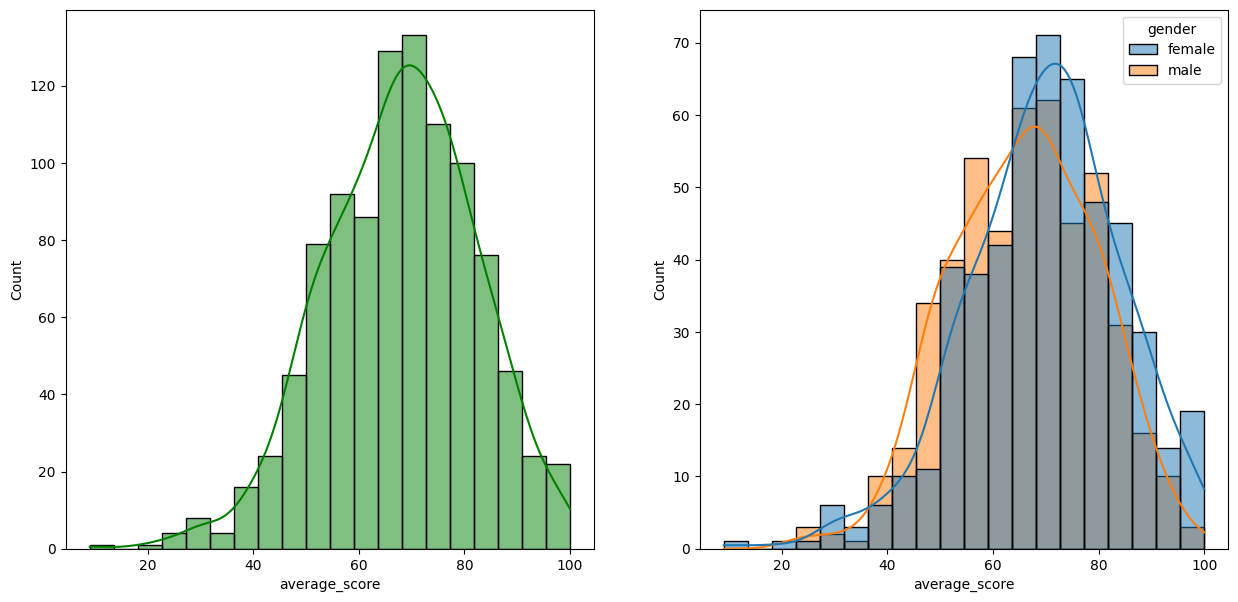

In [17]:
# Checking the distribution of average score and gender
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=20,kde=True,color='g') #compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s). Only relevant with univariate data.
plt.subplot(122)
sns.histplot(data=df,x='average_score',bins=20,kde=True,hue='gender')
plt.show()

* Female students performed better compred to male students

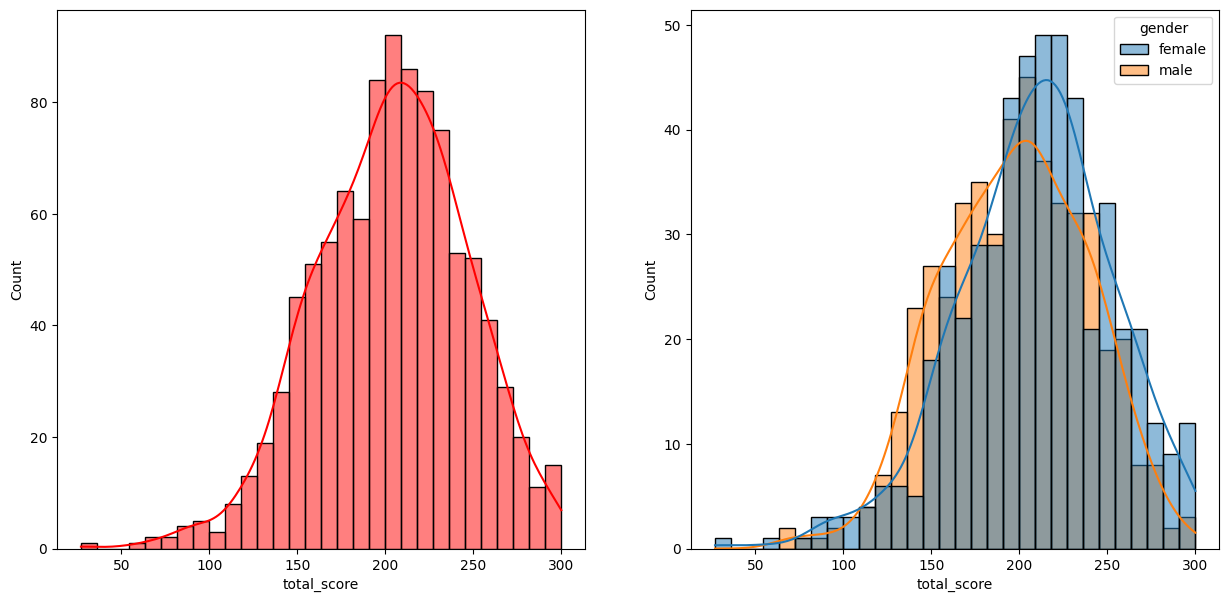

In [18]:
# checking distribution of total score with respect  to gender
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x=df['total_score'],bins=30,color='red',kde=True)
plt.subplot(122)
sns.histplot(data=df,x=df['total_score'],bins=30,color='gray',kde=True,hue='gender')
plt.show()

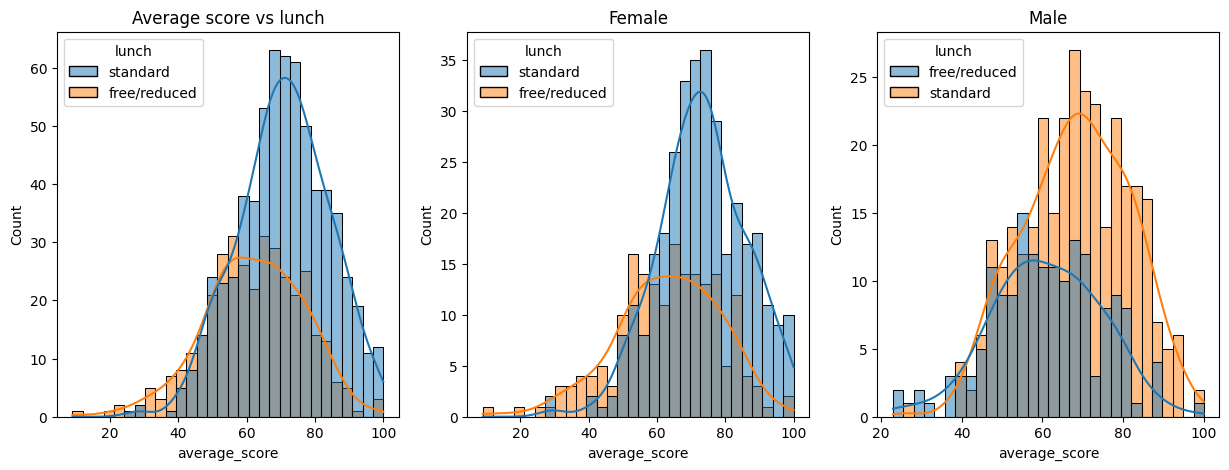

In [19]:
# Checking the distribution of lunch with gender with Average Scores
fig,axs=plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.histplot(data=df,x='average_score',hue='lunch',bins=30,color='skyblue',kde=True).set_title("Average score vs lunch")
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='average_score',hue='lunch',bins=30,color='skyblue',kde=True).set_title("Female")
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average_score',hue='lunch',bins=30,color='skyblue',kde=True).set_title("Male")
plt.show()

* students perform better with standard lunch



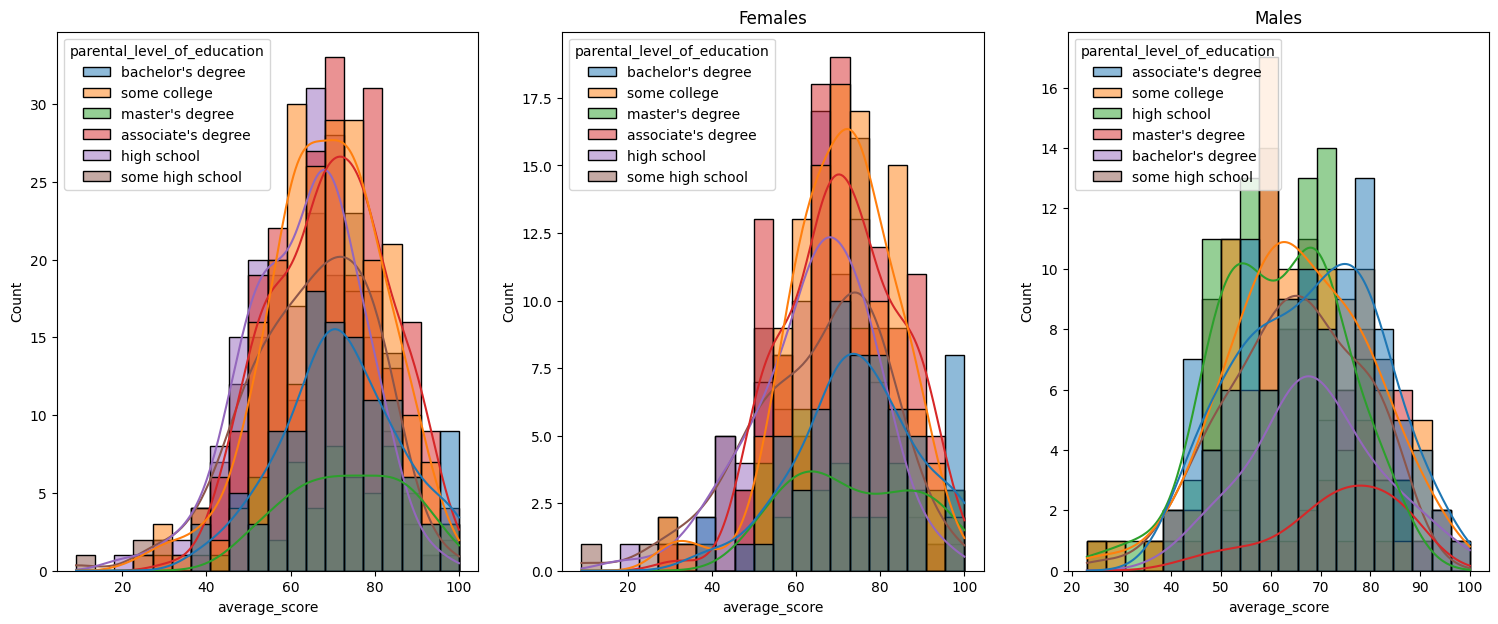

In [20]:
# Distribution with respect to parental_level_of_education vs average score
fig,axs=plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df,x='average_score',hue='parental_level_of_education',bins=20,kde=True,color='gray')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='average_score',hue='parental_level_of_education',bins=20,kde=True,color='blue').set_title('Females')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='average_score',hue='parental_level_of_education',bins=20,kde=True,color='red').set_title('Males')
plt.show()

##### Insights
* Parents education doen't effect student's performance with there exams

##### 4.2 Maximumum score of students in all three subjects

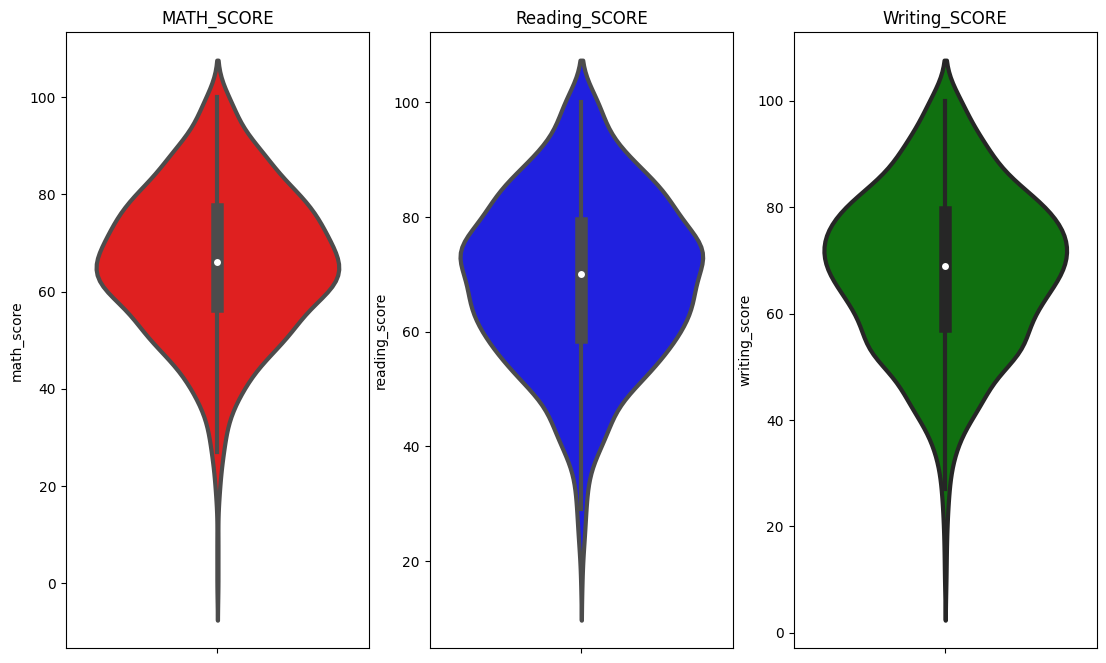

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(141)
sns.violinplot(data=df,y='math_score',linewidth=3,color='red').set_title("MATH_SCORE")
plt.subplot(142)
sns.violinplot(data=df,y='reading_score',linewidth=3,color='blue').set_title("Reading_SCORE")
plt.subplot(143)
sns.violinplot(data=df,y='writing_score',linewidth=3,color='green').set_title("Writing_SCORE")
plt.show()

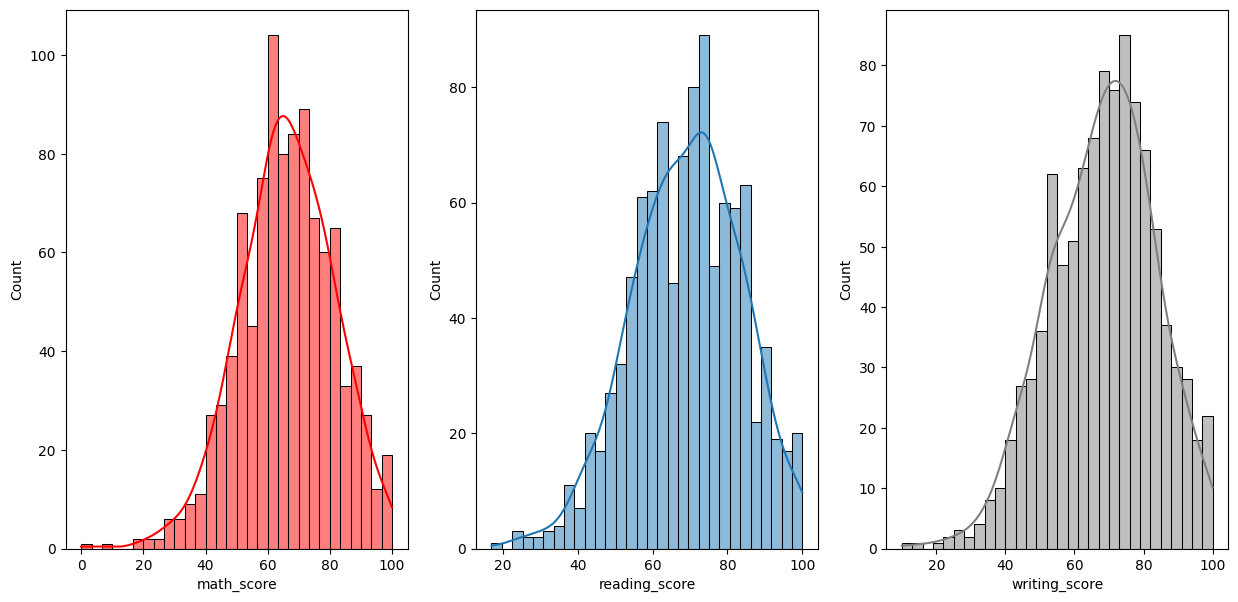

In [22]:
plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
ax=sns.histplot(data=df,x='math_score',kde=True,bins=30,color='red')
plt.subplot(132)
ax=sns.histplot(data=df,x='reading_score',kde=True,bins=30)
plt.subplot(133)
ax=sns.histplot(data=df,x='writing_score',kde=True,bins=30,color='gray')
plt.show()

##### Insights
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

##### 4.3 Multivariate analysis using pieplot

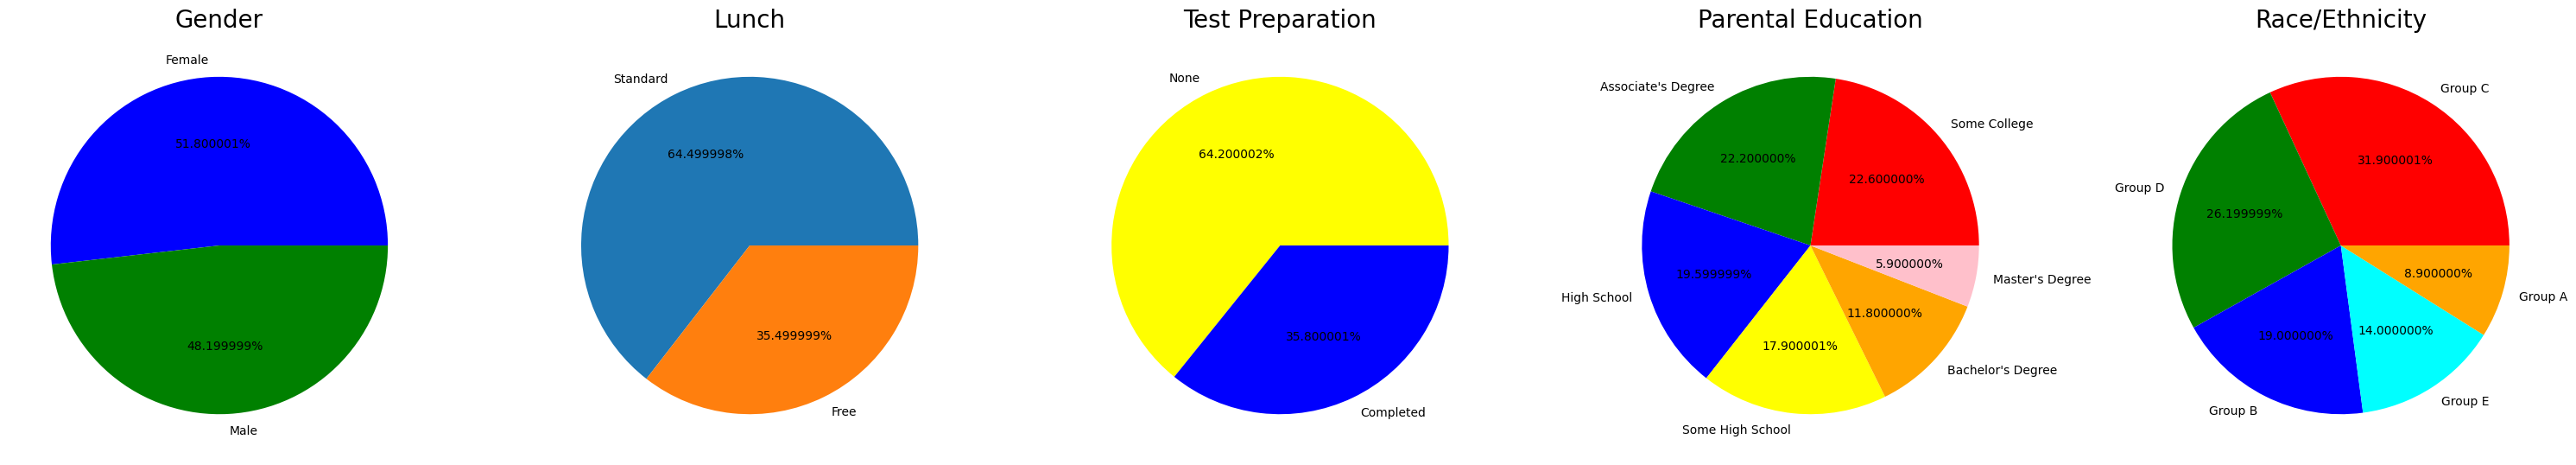

In [27]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['blue','green']

plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('Gender', fontsize = 20)

plt.subplot(1, 5, 2)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
plt.pie(size,labels=labels,autopct = '%2f%%')
plt.title('Lunch', fontsize = 20)

plt.subplot(1, 5, 3)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color=['yellow', 'blue']
plt.pie(size,labels=labels,colors = color,autopct = '%2f%%')
plt.title('Test Preparation', fontsize = 20)

plt.subplot(1, 5, 4)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color=['red','green','blue','yellow','orange','pink']
plt.pie(size,labels=labels,colors = color,autopct = '%2f%%')
plt.title('Parental Education', fontsize = 20)

plt.subplot(1, 5, 5)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()



plt.show()

##### Insights
* Number of Male and Female students is almost equal
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"
* Number students are greatest in Group C

#### 4.4 Feature wise visualization
##### 4.4.1 Gender column visualization
* Does gender have any impact on performance?

##### Univariate analysis 

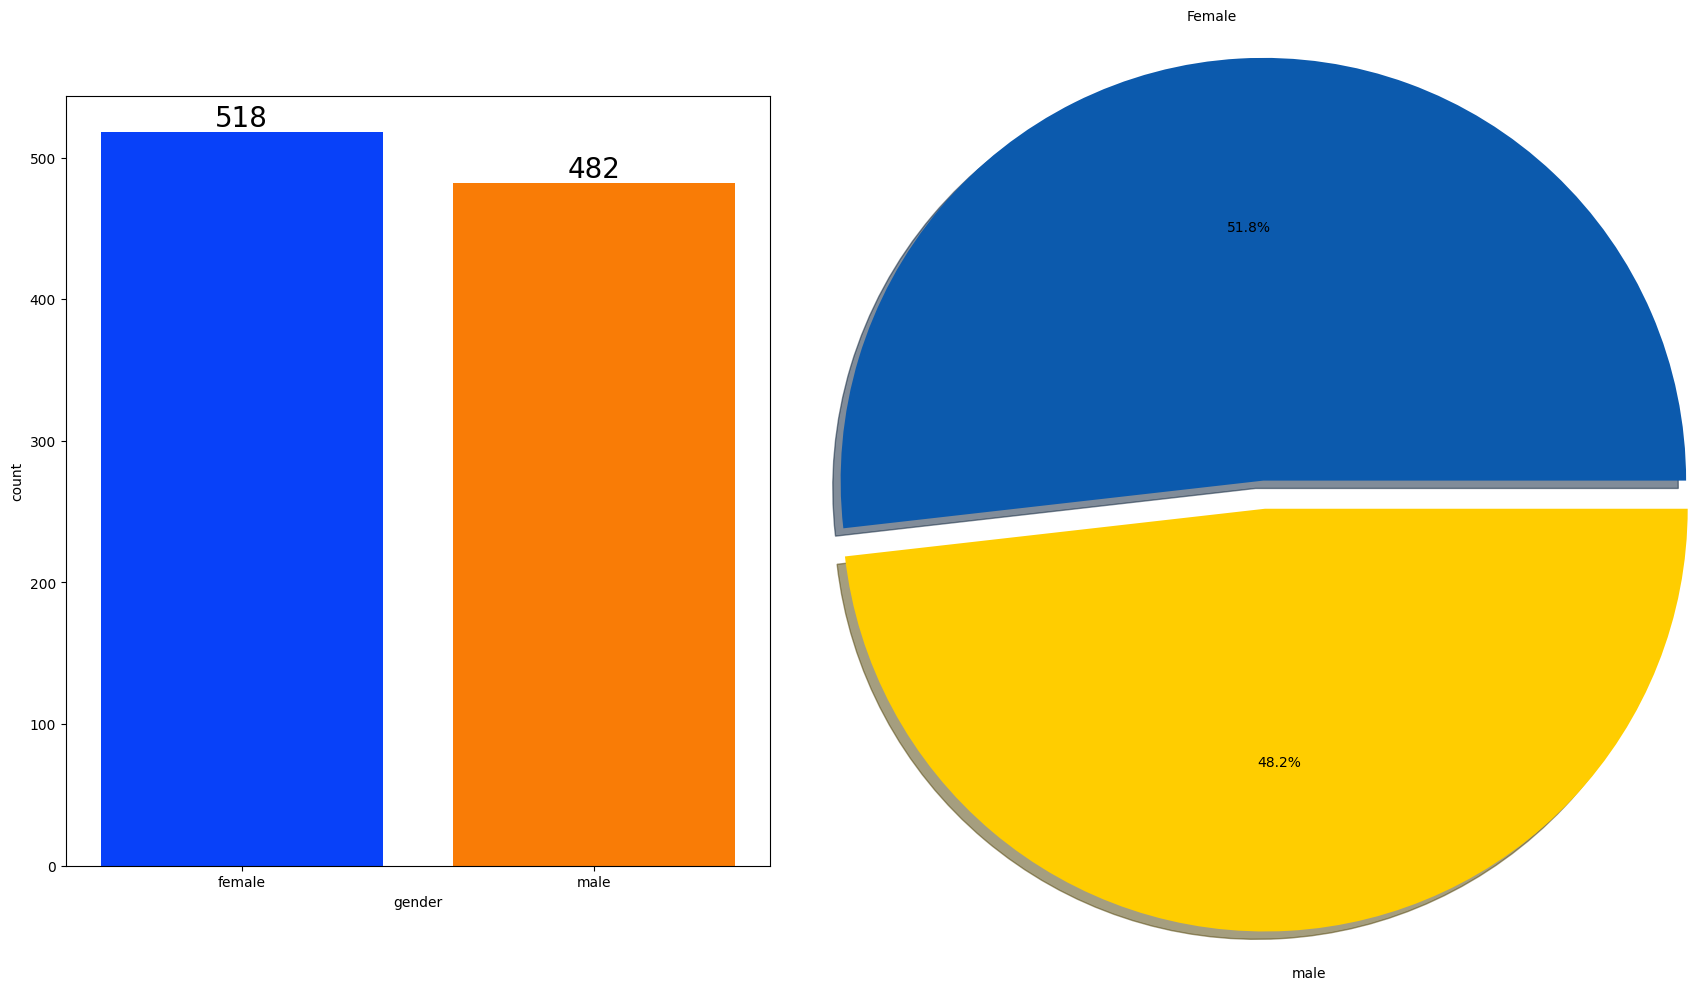

In [24]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df,x=df['gender'],ax=ax[0],palette='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Female','male'],autopct='%1.1f%%',radius=1.5,colors=['#0C5AAD','#FFCD00'],shadow=True,explode=(0,0.1))
plt.show()

##### Insights
* Gender has balaced data with 52% females and 48% males

##### Bivariate analysis of gender with total score

In [41]:
modified_df=df.drop(columns=['race_ethnicity','parental_level_of_education','lunch','test_preparation_course'],axis=1)
gender_group=modified_df.groupby(['gender']).mean()
gender_group


,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


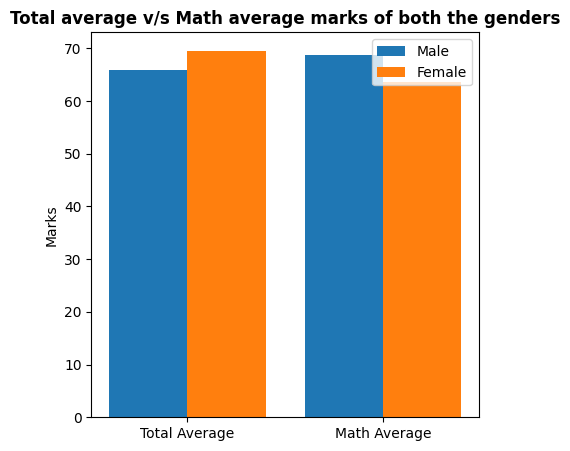

In [49]:
plt.figure(figsize=(5,5))
X=['Total Average','Math Average']
female_score=[gender_group['average_score'][0],gender_group['math_score'][0]]
male_score=[gender_group['average_score'][1],gender_group['math_score'][1]]
x_axis=np.arange(len(X))
plt.bar(x_axis - 0.2, male_score, 0.4, label = 'Male')
plt.bar(x_axis + 0.2, female_score, 0.4, label = 'Female')
  
plt.xticks(x_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

##### Insights
* On an average females have performed better than males from overall scores
* but males have performed bettter in maths


##### 4.4.1 Race/Ethnicity Column
* Does this column have any impact on the student's performance

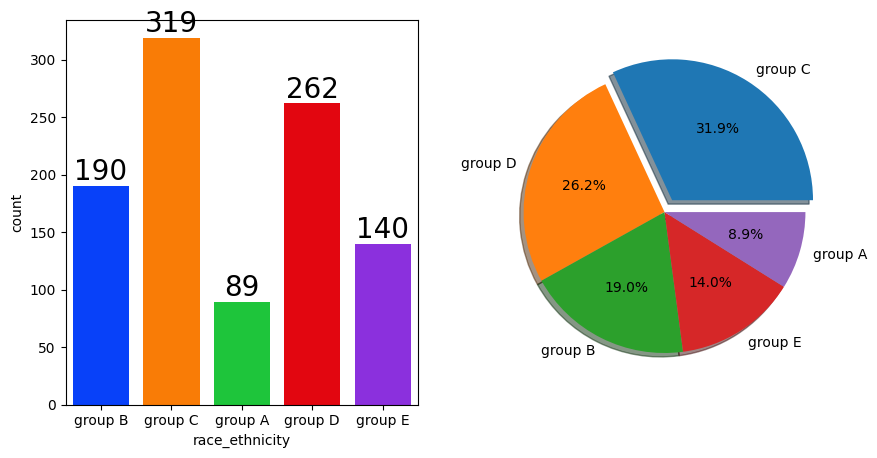

In [56]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=df,x=df['race_ethnicity'],ax=ax[0],palette='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   


##### Insights
* Most of the students belongs to group c
* very less students belong to group A

##### Bivariate Analysis of Race_ethnicity variable

In [57]:
group_race=df.groupby('race_ethnicity')
group_race

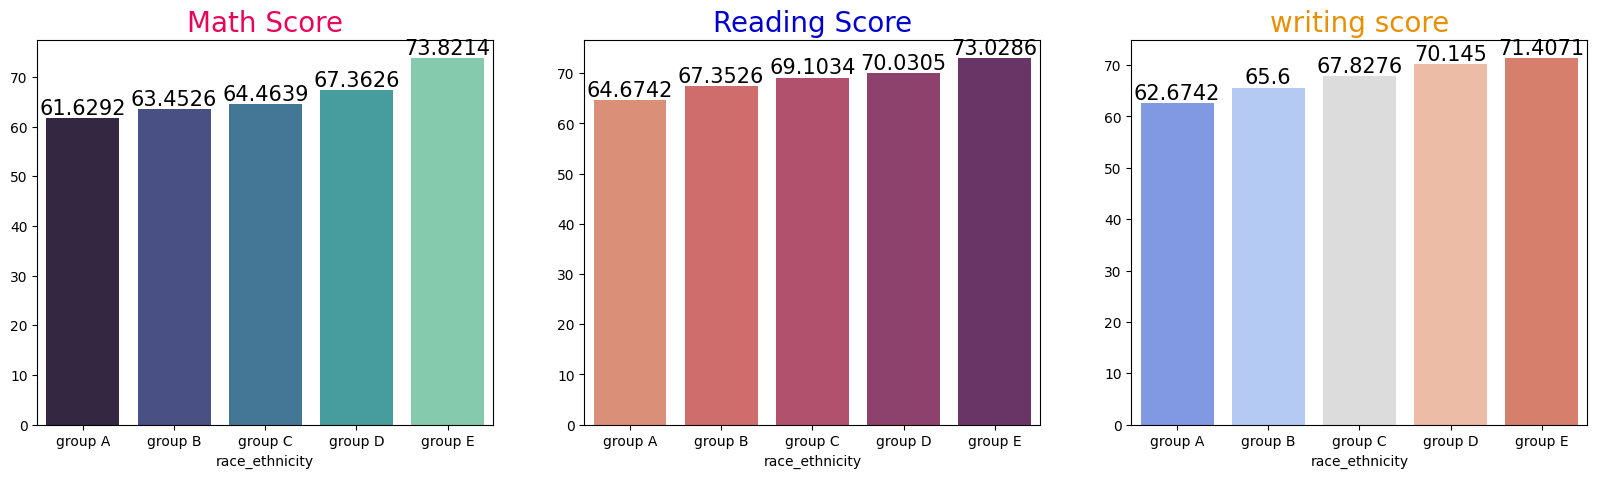

In [72]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
sns.barplot(x=group_race['math_score'].mean().index,y=group_race['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title("Math Score",color='#e7055c',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=group_race['reading_score'].mean().index,y=group_race['reading_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading Score',color='#0000cf',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=group_race['writing_score'].mean().index,y=group_race['writing_score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('writing score',color='#e79005',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

##### Insights
* Group E students have performed well and secured highest marks
* Group A students have secured bad marks

##### 4.4.3 Parental level of education column
* what is the education background of the student's parents?
* How the parents education impact on the student's performance?

##### Univariate Analysis

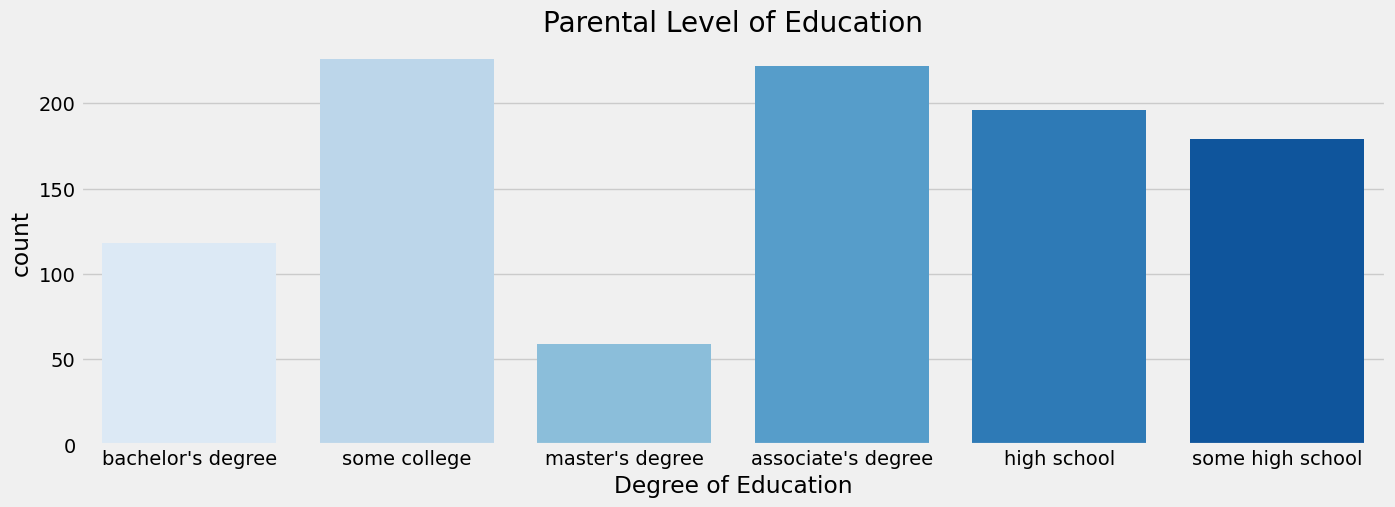

In [80]:
plt.rcParams['figure.figsize'] =(15,5)
plt.style.use('fivethirtyeight')
sns.countplot(data=df,x=df['parental_level_of_education'],palette='Blues',saturation=0.95).set_title('Parental Level of Education')
plt.xlabel('Degree of Education')
plt.show()

##### Insights
* Most of the students parents are from some college

##### Bivariate Analysis

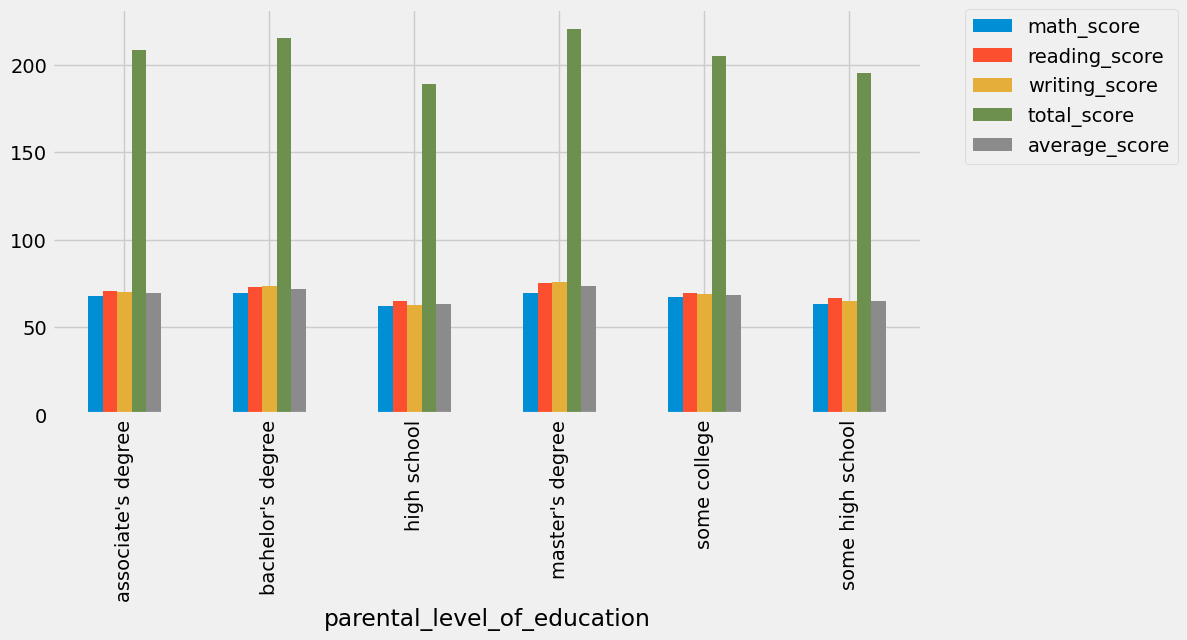

In [91]:
df_pe=df.drop(columns=['race_ethnicity','gender','lunch','test_preparation_course'],axis=1)
df_pe.groupby('parental_level_of_education').mean().plot(kind='bar',figsize=(10,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### Insights
* The score of student whose parents possess master and bachelor degrees are higher than others

##### 4.4.4 Lunch column
* Which type of lunch column is commom among students?
* What is the  effect of lunch in student's performance?

##### Univariate Analysis 
* Which type of lunch is most common among students

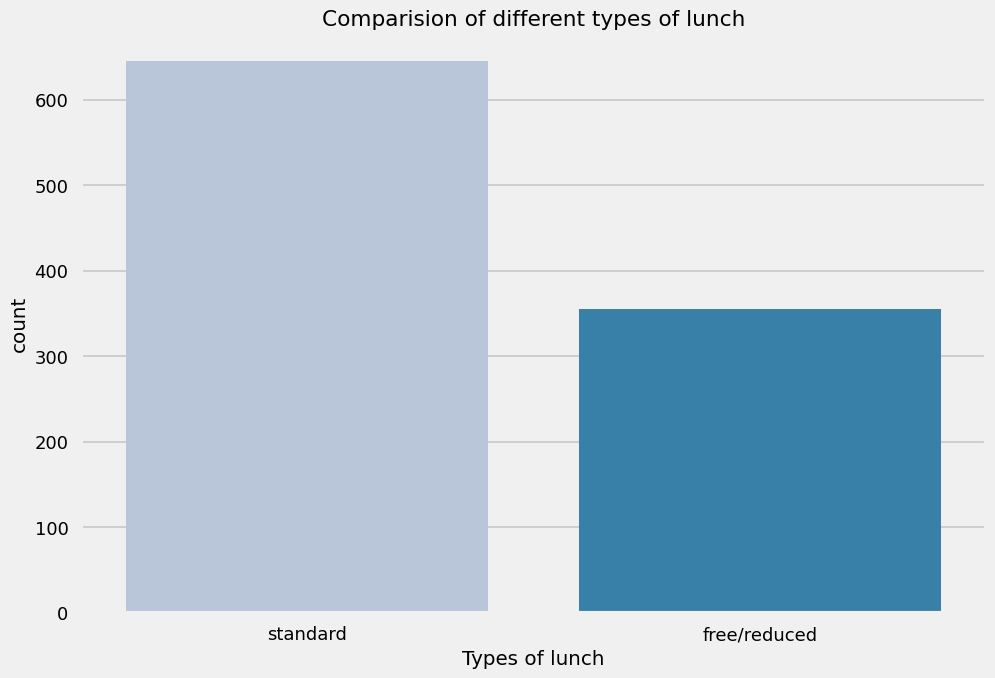

In [95]:
plt.rcParams['figure.figsize']=(15,5)
plt.style.use('seaborn-talk')
sns.countplot(data=df,x=df['lunch'],palette='PuBu').set_title('Comparision of different types of lunch')
plt.xlabel('Types of lunch')
plt.show()


##### Insights
* Students were served standard lunch when compared to reduced/free

##### Bivariate analysis
* does lunch type intake has any impact on students performance?

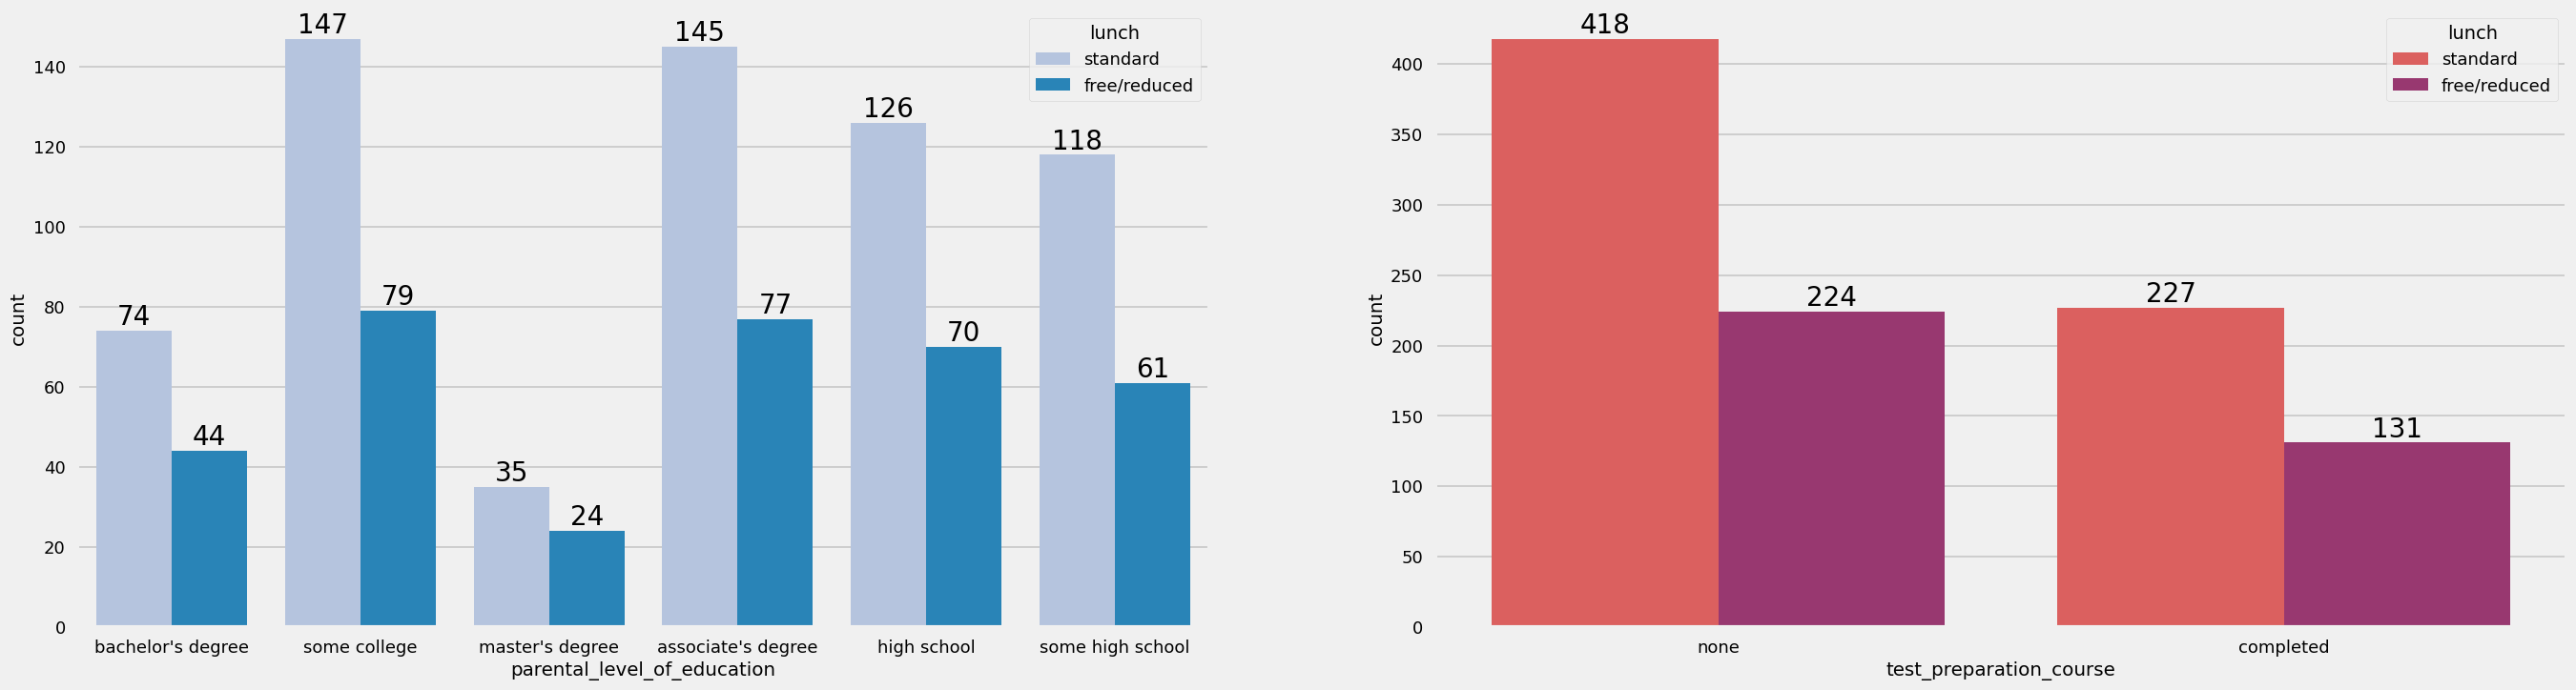

In [108]:
fig,ax=plt.subplots(1,2,figsize=(30,8))
sns.countplot(data=df,x=df['parental_level_of_education'],palette='PuBu',hue='lunch',saturation=0.95,ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['test_preparation_course'],data=df,palette = 'flare',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   
plt.show()

##### Insights
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### Test Preparation course column
* Does test preparation have any impact on student's performance?

##### Univariate analysis

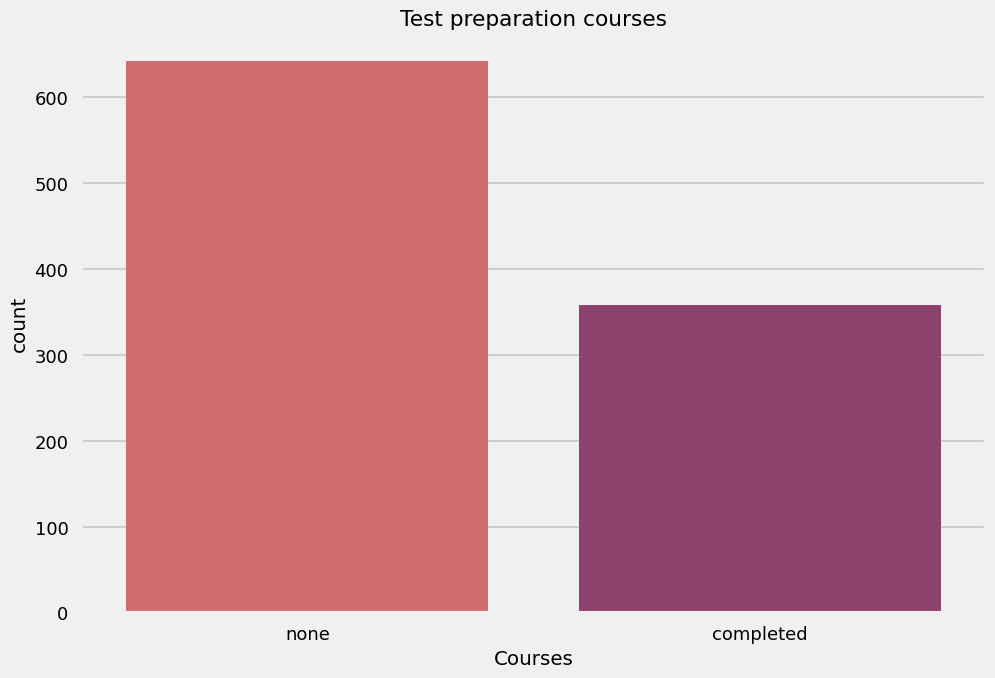

In [110]:
plt.rcParams['figure.figsize'] =(10,5)
plt.style.use('seaborn-talk')
sns.countplot(data=df,x=df['test_preparation_course'],palette='flare').set_title('Test preparation courses')
plt.xlabel('Courses')
plt.show()

##### Insights
* Students who have completed the course are very few compared to none

##### Bivariate Analysis

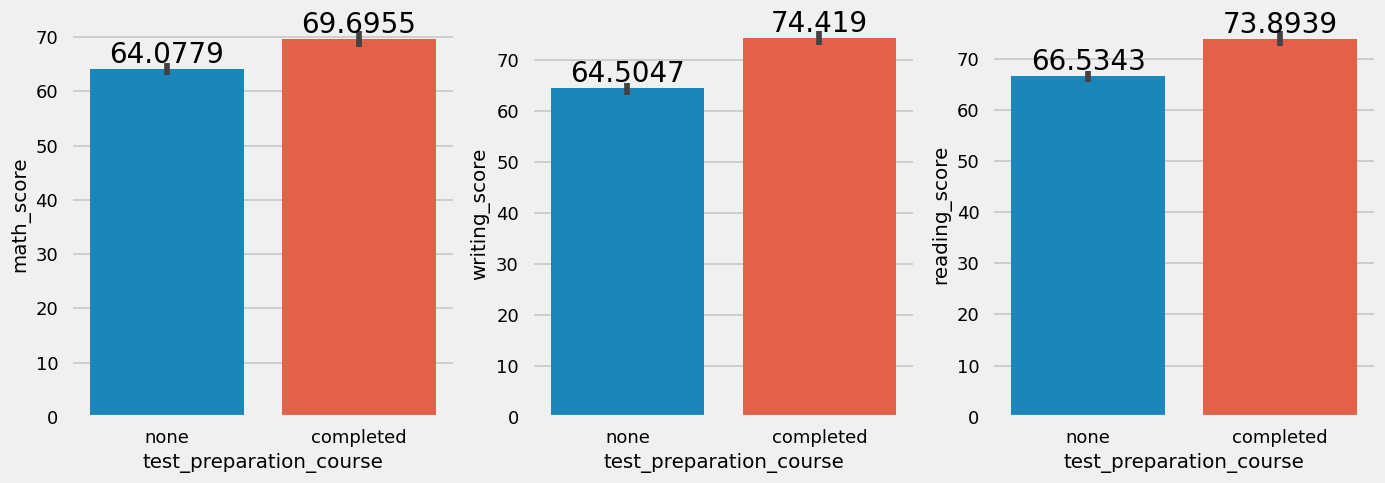

In [116]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=df,x=df['test_preparation_course'],y=df['math_score'],ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.barplot(data=df,x=df['test_preparation_course'],y=df['writing_score'],ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

sns.barplot(data=df,x=df['test_preparation_course'],y=df['reading_score'],ax=ax[2])
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=20)

##### Insights
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course


##### 4.4.6 CHECKING OUTLIERS


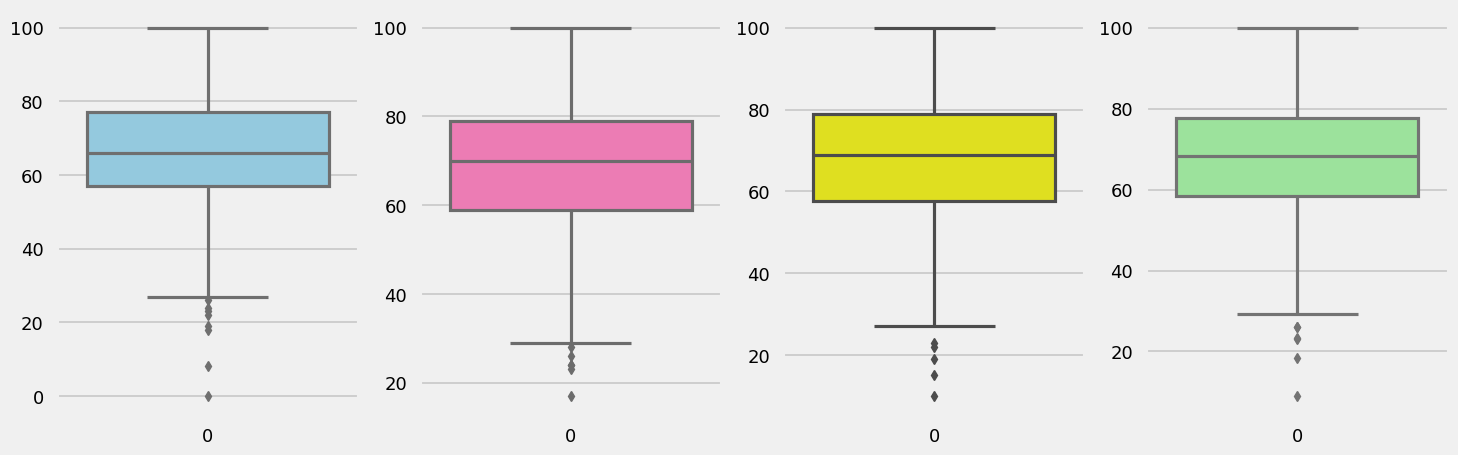

In [117]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

##### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

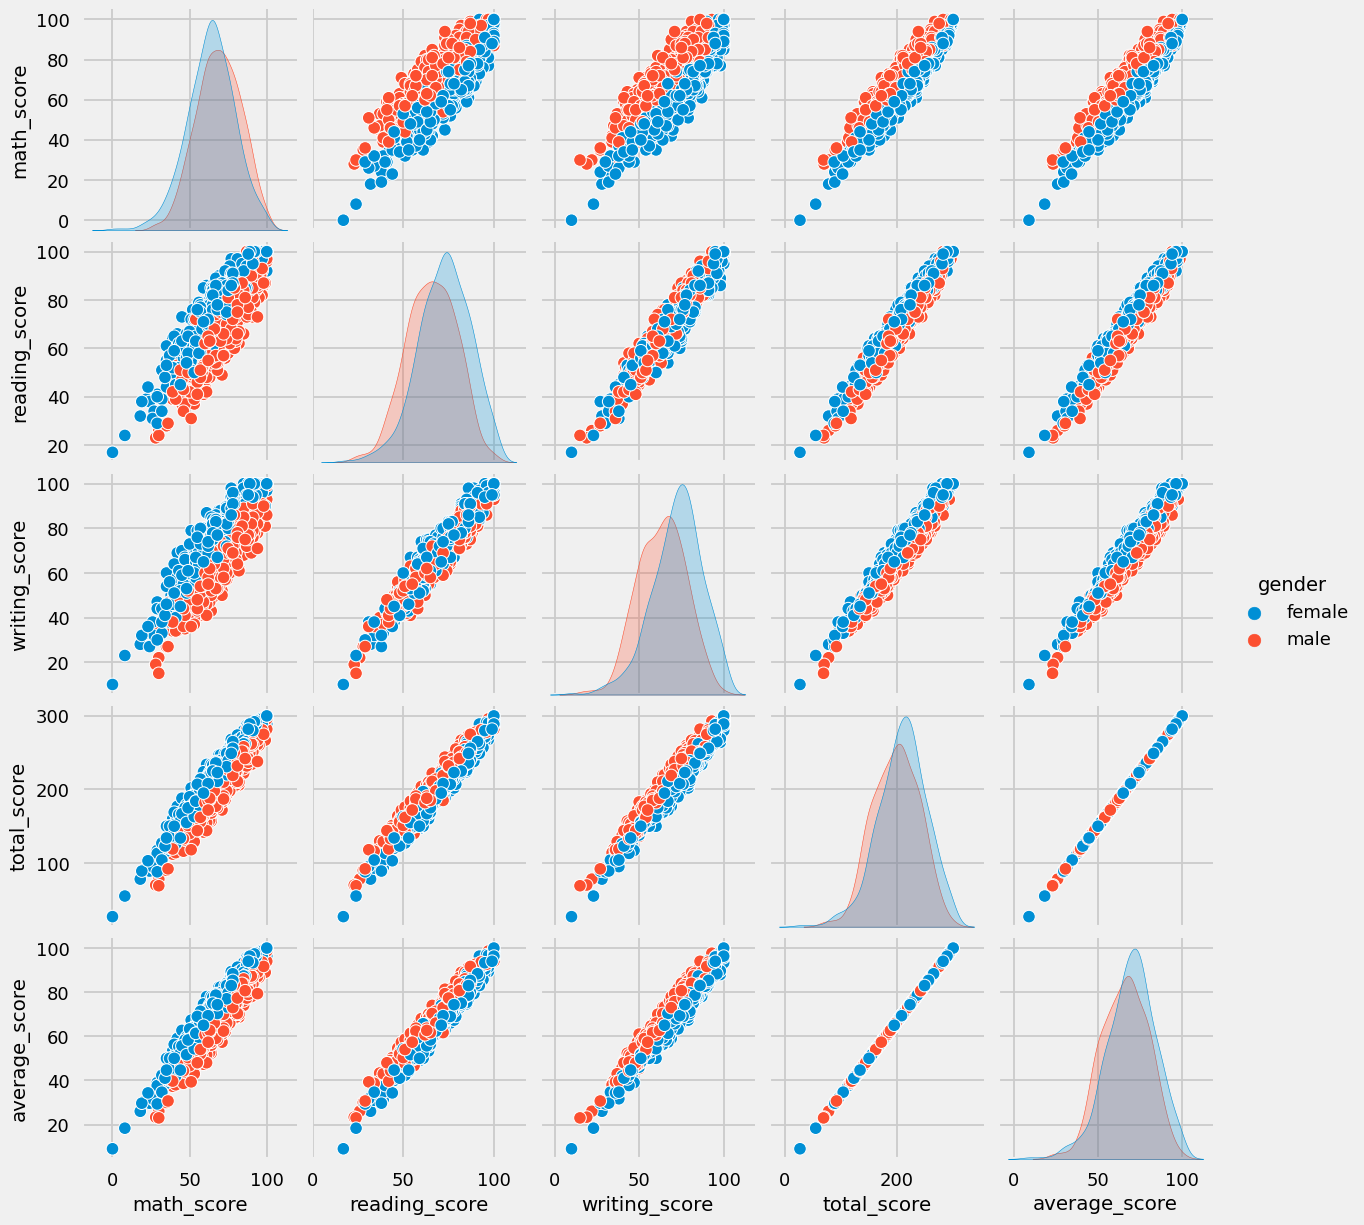

In [118]:
sns.pairplot(df,hue = 'gender')
plt.show()

##### Insights
* From the above plot it is clear that all the scores increase linearly with each other.

##### 5. Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females gets good pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing test preparation course is benefitial for securing better marks